In [1]:
import os
import io
import time
import math
import string
import time
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import re
from string import punctuation

<h3> 3. Result Visualization</h3>

In [2]:
#load file and drop neutral
op = pd.read_csv('predict_output_xgb.csv')
op = op.loc[op['pred_sentiment'] != 'neutral']

In [3]:
#get month and year of creation for splitting of data later
op['created'] = pd.to_datetime(op['created'], format = '%d/%m/%Y %H:%M')
op['day'] = op['created'].dt.day
op['month'] = op['created'].dt.month
op['year'] = op['created'].dt.year
op = op.rename(columns={'pred_sentiment': 'Sentiment'})

In [4]:
#group
grouped = op.groupby(['year', 'month', 'Sentiment']).size().reset_index()
#pivot table
pivot = grouped.pivot_table(index = ['year', 'month'], columns = 'Sentiment', values ='Sentiment', fill_value = 0)
pivot_prop = pivot.div(pivot.sum(axis = 1), axis = 0)

<h3>3.1. Sentiments by Month (Past year; inclusive of post-launch period between 7th to 14th Feb 2023) </h3>

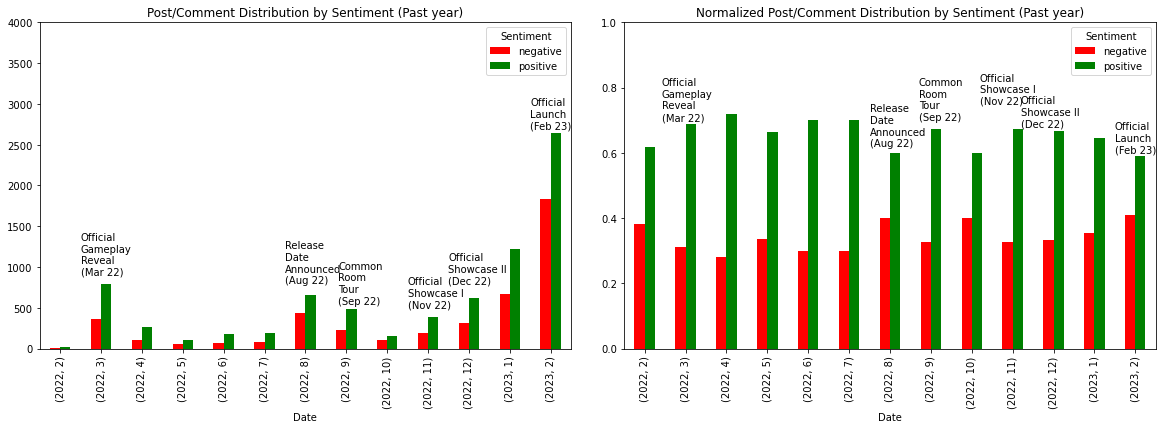

In [5]:
#by proportion
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

#raw values
cols = ['red', 'green']
pivot.plot(
    kind = 'bar', stacked = False, 
    figsize = (20, 10), color = cols,
    ax = ax1, xlabel = 'Date',
    title = 'Post/Comment Distribution by Sentiment (Past year)'
)

ax1.set_ylim(top = 4000)
ax1.text(0.5, 900, 'Official\nGameplay\nReveal\n(Mar 22)')
ax1.text(5.5, 800, 'Release\nDate\nAnnounced\n(Aug 22)')
ax1.text(6.8, 550, 'Common\nRoom\nTour\n(Sep 22)')
ax1.text(8.5, 500, 'Official\nShowcase I\n(Nov 22)')
ax1.text(9.5, 800, 'Official\nShowcase II\n(Dec 22)')
ax1.text(11.5, 2700, 'Official\nLaunch\n(Feb 23)')

#normalized
pivot_prop.plot(
    kind = 'bar', stacked = False, 
    figsize = (20, 6), color = cols, 
    ax = ax2, xlabel = 'Date',
    title = 'Normalized Post/Comment Distribution by Sentiment (Past year)'
)

ax2.set_ylim(top = 1)
ax2.text(0.42, 0.7, 'Official\nGameplay\nReveal\n(Mar 22)')
ax2.text(5.5, 0.62, 'Release\nDate\nAnnounced\n(Aug 22)')
ax2.text(6.7, 0.7, 'Common\nRoom\nTour\n(Sep 22)')
ax2.text(8.2, 0.75, 'Official\nShowcase I\n(Nov 22)')
ax2.text(9.2, 0.68, 'Official\nShowcase II\n(Dec 22)')
ax2.text(11.5, 0.6, 'Official\nLaunch\n(Feb 23)')

#reduce space
plt.subplots_adjust(wspace=0.1)

<h3>3.2. Post-launch (7th ~ 14th Feb 2023 only)</h3>

Text(2.75, 0.62, 'Official Release\n(Day 1 Patch)')

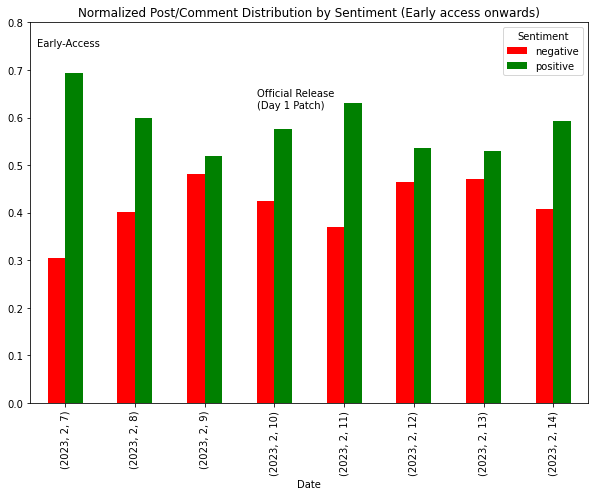

In [6]:
post_launch = op.loc[pd.to_datetime(op['created'])>=dt.datetime(2023,2,7,6,0,0)].reset_index(drop = True)

#group and form pivot table for visualization
grouped2 = post_launch.groupby(['year', 'month', 'day', 'Sentiment']).size().reset_index()

#group and form pivot table for visualization
pivot2 = grouped2.pivot_table(index = ['year', 'month', 'day'], columns = 'Sentiment', values ='Sentiment', fill_value = 0)
pivot_prop2 = pivot2.div(pivot2.sum(axis = 1), axis = 0)

#by proportion
ax3 = pivot_prop2.plot(kind = 'bar', stacked = False, figsize = (10, 7), color = cols)
plt.xlabel('Date')
plt.title('Normalized Post/Comment Distribution by Sentiment (Early access onwards)')

ax3.set_ylim(top = 0.8)
ax3.text(-0.4, 0.75, 'Early-Access')
ax3.text(2.75, 0.62, 'Official Release\n(Day 1 Patch)')